#TASK #1: UNDESTAND THE PROBLEM STATEMENT AND BUSINESS CASE

![alt text](https://drive.google.com/uc?id=1djxup79_KiGtKFiH7AgSD0Bj-2D90TBg)

#TASK #2: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [46]:
# install nltk
# NLTK: Natural Language tool kit
!pip install nltk

In [47]:
# install gensim
# Gensim is an open-source library for unsupervised topic modeling and natural language processing
# Gensim is implemented in Python and Cython.
!pip install gensim

In [48]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [49]:
import os
import pandas as pd
os.getcwd()
cwd = os.getcwd()
cwd

'c:\\Users\\Owner\\Documents\\Projects\\StockPrediction\\Section20-SentimentAnalysis'

In [50]:
# Read the file (locally instead of via gdrive)
stocks_df = pd.read_csv(cwd + r'/stock_sentiment.csv')
stocks_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [51]:
# # load the stock news data
# stock_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Python & ML in Finance/stock_sentiment.csv")

In [52]:
# Let's view the dataset 
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [53]:
# check for null values
stocks_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

**MINI CHALLENGE #1:**

- **How many unique elements are present in the 'sentiment' column? Try to find out with two different methods**

In [54]:
len(stocks_df['Sentiment'])

5791

In [55]:
stocks_df['Sentiment'].describe

<bound method NDFrame.describe of 0       1
1       1
2       1
3       1
4       1
       ..
5786    0
5787    0
5788    1
5789    1
5790    1
Name: Sentiment, Length: 5791, dtype: int64>

<AxesSubplot: xlabel='Sentiment', ylabel='count'>

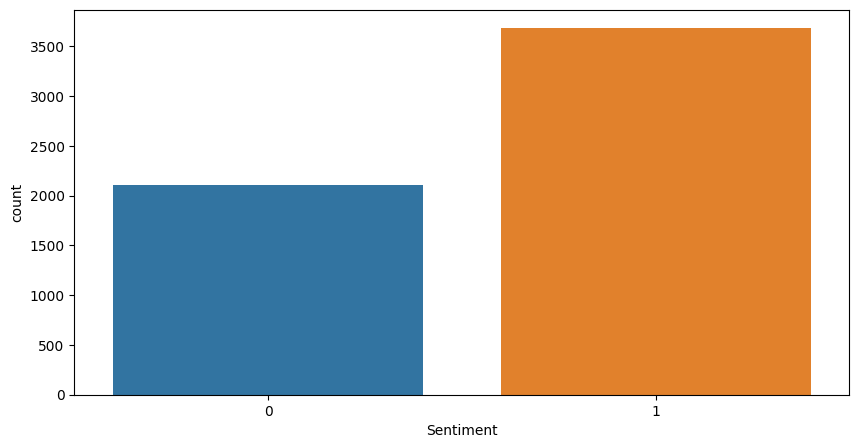

In [56]:
# using seaborn
plt.figure(figsize=(10,5))

sns.countplot(x=stocks_df['Sentiment'])

In [57]:
# using n unique 
stocks_df.nunique()

Text         5791
Sentiment       2
dtype: int64

#TASK #3: PERFORM DATA CLEANING (REMOVE PUNCTUATIONS FROM TEXT)



In [58]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
Test = '$ I love AI !! & I also love ML@'
Test1 = 'Good morning beautiful people !!! I am having fun learning finance with Python :) ...'

In [60]:

test_punc_remove = [char for char in Test if char not in string.punctuation]
test_punc_remove


[' ',
 'I',
 ' ',
 'l',
 'o',
 'v',
 'e',
 ' ',
 'A',
 'I',
 ' ',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'l',
 's',
 'o',
 ' ',
 'l',
 'o',
 'v',
 'e',
 ' ',
 'M',
 'L']

In [61]:
test_punc_join = ''.join(test_punc_remove)
test_punc_join

' I love AI   I also love ML'

In [62]:
# Let's define a function to remove punctuations

def remove_punc(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed_join = ''.join(test_punc_removed)
    return test_punc_removed_join

In [63]:
stocks_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [64]:
# Let's remove punctuations from our dataset 
stocks_df['Text Without Punctuation'] = stocks_df['Text'].apply(remove_punc)

In [65]:
stocks_df

,Text,Sentiment,Text Without Punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


In [66]:
stocks_df['Text Without Punctuation'][2]

'user Id be afraid to short AMZN  they are looking like a nearmonopoly in eBooks and infrastructureasaservice'

**MINI CHALLENGE #2:** 
- **Remove punctuations using a different method**

In [67]:
Test_punc_removed1 = []

In [68]:

for char in Test1:
    if char not in string.punctuation:
        Test_punc_removed1.append(char)

Test_punc_removed_join = ''.join(Test_punc_removed1)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning finance with Python  '

# TASK #4: PERFORM DATA CLEANING (REMOVE STOPWORDS)

In [69]:
# download stopwords
nltk.download('stopwords')

stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [70]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'will', 'aap', 'co', 'day','user','stock','stock','today','week', 'year', 'https'])

In [71]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    # take text data, apply pre-process and obtain tokens for it (individual words)
    for token in gensim.utils.simple_preprocess(text):
        if token not in stop_words and len(token) >=2:
            result.append(token)
    return result

In [72]:
# apply pre-processing to the text column
stocks_df['Text Without Punctuation & Stopwords'] = stocks_df['Text Without Punctuation'].apply(preprocess)

In [73]:
stocks_df

,Text,Sentiment,Text Without Punctuation,Text Without Punctuation & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[id, afraid, short, amzn, looking, like, nearm..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[oi]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, rs, investors, book, prof..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


In [74]:
stocks_df['Text'][0]

'Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

In [75]:
stocks_df['Text Without Punctuation & Stopwords'][0]

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'aj',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [76]:
# join the words into a string
# stock_df['Processed Text 2'] = stock_df['Processed Text 2'].apply(lambda x: " ".join(x))

**MINI CHALLENGE #3:**

- **Modify the code in order keep words that are longer than or equal 2 characters instead of 3**
- **Add 'https' to the list of stopwords and rerun the code**



In [77]:
# modify extended stopwords list above and change the len() condition in function to >=2 as done above in cell 89

# TASK #5: PLOT WORDCLOUD

In [79]:
stocks_df['Text Without Punctuation & Stopwords Joined'] = stocks_df['Text Without Punctuation & Stopwords'].apply(lambda x: " ".join(x))
stocks_df

,Text,Sentiment,Text Without Punctuation,Text Without Punctuation & Stopwords,Text Without Punctuation & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz aj ...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[id, afraid, short, amzn, looking, like, nearm...",id afraid short amzn looking like nearmonopoly...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[oi],oi
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, rs, investors, book, prof...",gold prices slip rs investors book profits ami...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


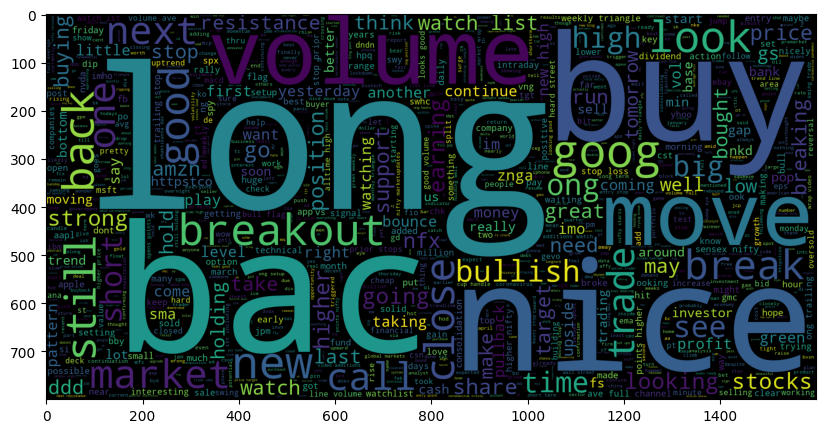

In [81]:
# positive sentiment
plt.figure(figsize=(10,5))
wc = WordCloud(max_words=1000, width=1600, height=800).generate(" ".join(stocks_df[stocks_df['Sentiment']==1]['Text Without Punctuation & Stopwords Joined']))
plt.imshow(wc)


**MINI CHALLENGE #4:**
- **Visualize the wordcloud for tweets that have negative sentiment**

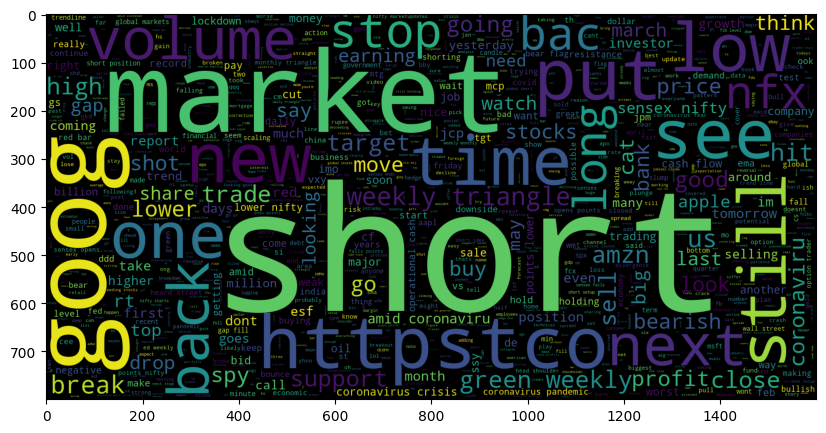

In [82]:
# negative sentiment
plt.figure(figsize=(10,5))
wc = WordCloud(max_words=1000, width=1600, height=800).generate(" ".join(stocks_df[stocks_df['Sentiment']==0]['Text Without Punctuation & Stopwords Joined']))
plt.imshow(wc)

# TASK #6: VISUALIZE CLEANED DATASETS

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# word_tokenize is used to break up a string into words


kickers watchlist xide tit soq pnk cpw bpz trade method method prev posts
['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'prev', 'posts']


In [ ]:
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated


The maximum number of words in any document is: 19


[13,
 6,
 7,
 1,
 0,
 1,
 7,
 13,
 8,
 4,
 8,
 14,
 8,
 8,
 10,
 5,
 10,
 8,
 12,
 4,
 5,
 4,
 1,
 5,
 3,
 9,
 3,
 3,
 9,
 6,
 6,
 8,
 7,
 3,
 10,
 9,
 4,
 8,
 10,
 9,
 8,
 3,
 9,
 5,
 4,
 10,
 8,
 4,
 7,
 9,
 10,
 9,
 7,
 2,
 14,
 11,
 8,
 8,
 1,
 14,
 7,
 10,
 4,
 13,
 6,
 6,
 6,
 5,
 6,
 7,
 9,
 4,
 8,
 13,
 16,
 6,
 8,
 6,
 2,
 9,
 5,
 4,
 8,
 9,
 16,
 4,
 8,
 5,
 6,
 2,
 1,
 5,
 8,
 3,
 7,
 6,
 6,
 8,
 1,
 3,
 7,
 4,
 14,
 8,
 9,
 9,
 18,
 6,
 6,
 12,
 10,
 7,
 3,
 3,
 10,
 10,
 7,
 6,
 8,
 5,
 4,
 7,
 9,
 13,
 2,
 4,
 8,
 14,
 13,
 10,
 3,
 1,
 1,
 2,
 7,
 11,
 11,
 8,
 8,
 10,
 9,
 10,
 13,
 6,
 7,
 8,
 11,
 9,
 6,
 10,
 10,
 4,
 8,
 8,
 12,
 11,
 7,
 11,
 4,
 5,
 3,
 7,
 2,
 4,
 9,
 4,
 6,
 10,
 5,
 15,
 7,
 5,
 5,
 9,
 9,
 8,
 8,
 2,
 8,
 9,
 8,
 11,
 7,
 8,
 6,
 3,
 5,
 5,
 8,
 9,
 4,
 6,
 5,
 4,
 3,
 6,
 10,
 7,
 6,
 9,
 8,
 7,
 9,
 11,
 8,
 5,
 5,
 3,
 10,
 11,
 6,
 9,
 9,
 12,
 9,
 6,
 6,
 7,
 10,
 10,
 3,
 3,
 2,
 10,
 2,
 9,
 8,
 14,
 10,
 9,
 12,
 6,
 7,
 2,
 1,
 12,
 1

In [ ]:
# Plot the distribution for the number of words in a text


**MINI CHALLENGE #5:**
- **Use Seaborn Countplot to visually indicate how many samples belong to the positive and negative sentiments class**

# TASK #7: PREPARE THE DATA BY TOKENIZING AND PADDING

![alt text](https://drive.google.com/uc?id=13j8m-JOpK994CtukR1EShiY_hGGjkNx-)

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


In [ ]:
# Obtain the total words present in the dataset



['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'prev',
 'posts',
 'movie',
 'return',
 'feageed',
 'indicator',
 'trades',
 'awesome',
 'afraid',
 'short',
 'amzn',
 'looking',
 'like',
 'nearmonopoly',
 'ebooks',
 'mnta',
 'pgnx',
 'current',
 'downtrend',
 'break',
 'shortterm',
 'correction',
 'medterm',
 'downtrend',
 'mondays',
 'relative',
 'weakness',
 'nyx',
 'win',
 'tie',
 'tap',
 'ice',
 'int',
 'bmc',
 'aon',
 'chk',
 'biib',
 'goog',
 'ower',
 'trend',
 'line',
 'channel',
 'test',
 'volume',
 'support',
 'watch',
 'tomorrow',
 'ong',
 'entry',
 'assuming',
 'fcx',
 'opens',
 'tomorrow',
 'trigger',
 'buy',
 'like',
 'setup',
 'worries',
 'expects',
 'market',
 'rally',
 'nowusually',
 'exact',
 'opposite',
 'happens',
 'time',
 'shall',
 'soon',
 'bac',
 'spx',
 'jpm',
 'gamcos',
 'arry',
 'haverty',
 'apple',
 'extremely',
 'cheap',
 'great',
 'video',
 'maykiljil',
 'posted',
 'agree',
 'msft',
 'going',
 'hig

In [ ]:
# Obtain the total number of unique words


9113

In [ ]:
# split the data into test and train 


(5211,)

(580,)

5238    [allstate, said, dispatch, million, shelterinp...
3414    [traders, attracted, round, numbers, like, sur...
2669                       [time, break, inverse, target]
1114    [mcp, short, zero, play, goes, vxy, tvix, evap...
3723    [printed, babys, gonna, pop, tomorrow, share, ...
                              ...                        
4083               [chtp, like, flag, expecting, shortly]
1965    [bullish, signal, want, close, preferably, con...
681              [bac, swing, trade, protecting, profits]
188     [znga, fat, juicy, short, lower, levels, close...
3421    [goog, gonna, hit, tomorrow, prob, check, fact...
Name: Text Without Punc & Stopwords, Length: 5211, dtype: object

In [ ]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words



[[3500, 264, 3501, 72, 2389, 3502, 3503, 3504, 3505],
 [326, 3506, 1201, 629, 3, 212, 500, 2390],
 [19, 25, 1202, 33],
 [197, 1, 1808, 113, 118, 296, 3507, 3508],
 [2391, 3509, 501, 170, 66, 123, 12, 2392, 1203, 265, 1204, 124],
 [630, 902, 46, 139, 71, 182, 30, 83, 8, 38],
 [3510, 1809, 1810, 3511, 198, 43, 89, 1811, 1436, 1812, 3512, 3513],
 [5, 125, 2, 75, 240, 703],
 [2393, 3514, 381, 327, 3515, 461, 1437],
 [19, 1438, 3516, 191, 3517, 165, 631],
 [1813, 1439, 903, 1205, 153, 2394, 266, 904, 1814, 14, 154, 1206, 1, 791],
 [5, 2],
 [1033, 22, 108, 159, 199, 704, 4, 95, 360],
 [462, 29, 48, 27],
 [56, 23, 3518, 792, 1815, 3519, 463],
 [31, 61, 1034, 382, 140, 2, 1816, 102, 502, 3520],
 [1035, 109],
 [632, 3521, 1440, 580, 2395],
 [3522, 2396, 2397, 1207, 18, 581],
 [241, 328, 793, 3, 19, 12, 107, 88, 12, 66],
 [198, 222, 2398, 192, 1817, 70],
 [1441, 109, 4, 126, 11],
 [1036,
  3523,
  1818,
  1442,
  1819,
  3524,
  429,
  3525,
  3526,
  1820,
  2399,
  2400,
  383,
  2399,
  3527]

[[7, 30, 2250, 140, 232, 30, 645, 3456],
 [6, 25, 461, 42, 66, 2066, 35, 284, 62, 26, 2288],
 [788, 2837, 866, 65, 5, 816, 1529],
 [6, 3058, 4992, 755, 8538, 562],
 [100, 1669, 1181, 130, 175, 19],
 [958, 29, 174, 95, 98, 242, 52, 34, 64, 948],
 [190, 126, 320, 761, 369, 126, 517, 3972],
 [848, 1023, 421, 66],
 [208, 39, 3, 486, 74, 23, 596, 216, 5],
 [148, 243, 53, 213, 1416, 1214, 1214],
 [293, 7810, 1619, 16, 408, 49, 409, 203, 37],
 [1301, 984, 3170, 332, 1, 227],
 [118, 1, 272],
 [228, 6933, 553, 5238, 937],
 [305, 116],
 [16, 624, 188, 574, 9, 428, 367, 5161, 1540, 356, 7634],
 [2297, 890, 75, 212, 52, 374],
 [4277, 7545, 4747, 6288],
 [67, 237, 71, 4, 2518, 1019],
 [26, 17, 125, 64],
 [5084, 480, 508, 782, 2182, 545, 564, 14, 750],
 [1167, 77, 71],
 [1611, 2006, 1531, 253, 1072, 1102, 85, 173, 2482, 690],
 [35, 26, 17, 1],
 [9, 134, 92],
 [6, 1, 54, 65, 103, 66, 427, 5, 514, 1116],
 [652, 170, 2],
 [169, 19, 996, 2031, 53, 2738],
 [7062, 1170, 1272, 2902, 2123, 2918, 2597, 6080,

The encoding for document
 3414    [traders, attracted, round, numbers, like, sur...
Name: Text Without Punc & Stopwords, dtype: object 
 is:  [326, 3506, 1201, 629, 3, 212, 500, 2390]


In [ ]:
# Add padding to training and testing


The padded encoding for document: 1  is: [3500  264 3501   72 2389 3502 3503 3504 3505    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 2  is: [ 326 3506 1201  629    3  212  500 2390    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 3  is: [  19   25 1202   33    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]


In [ ]:
# Convert the data to categorical 2D representation


(5211, 2)

(580, 2)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

**MINI CHALLENGE #6:**

- **Change the padding length to 15 and rerun the code. Verify that padding was successful**


# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND RECURRENT NEURAL NETWORKS AND LONG SHORT TERM MEMORY NETWORKS (LSTM)

![alt text](https://drive.google.com/uc?id=1Giaz7q1THBFTuNFpSyLBKnoUbbvWlNw3)

![alt text](https://drive.google.com/uc?id=1iDKpQqmGTNr3riuQOvXdiwfy9wlCU5st)

![alt text](https://drive.google.com/uc?id=1PxW6DBer4d1Q9_9OSaAQDTtqUdDGLdYa)

# TASK #9: BUILD A CUSTOM-BASED DEEP NEURAL NETWORK TO PERFORM SENTIMENT ANALYSIS

![alt text](https://drive.google.com/uc?id=1zpI1XHM1CSxLPjsW7QTahfs_f2stzKeQ)

In [ ]:
# Sequential Model


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         4665856   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 5,486,466
Trainable params: 5,486,466
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train the model


Epoch 1/2
131/131 [==============================] - 26s 196ms/step - loss: 0.5723 - acc: 0.7133 - val_loss: 0.5260 - val_acc: 0.7565
Epoch 2/2
131/131 [==============================] - 25s 188ms/step - loss: 0.2901 - acc: 0.8880 - val_loss: 0.5011 - val_acc: 0.7613


**MINI CHALLENGE #7:**
- **Train the model using different embedding output dimension**

# TASK #8: ASSESS TRAINED MODEL PERFORMANCE

![alt text](https://drive.google.com/uc?id=1MZdb0g69XDC4JRATR9K6-2NAkrclGAXO)

In [ ]:
# make prediction
pred = model.predict(padded_test)

In [ ]:
# make prediction
prediction = []
for i in pred:
  prediction.append(np.argmax(i))

In [ ]:
# list containing original values
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [ ]:
# acuracy score on text data


0.7379310344827587

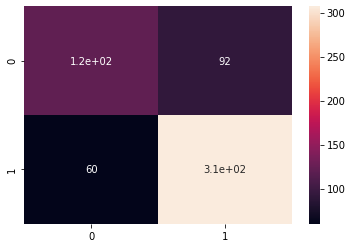

In [ ]:
# Plot the confusion matrix


**MINI CHALLENGE #8:**

- **Use a pretrained BERT model to make a sentiment analysis predictions**

# **EXCELLENT JOB!**

# **MINI CHALLENGE SOLUTIONS**

**MINI CHALLENGE #1 SOLUTION:**

- **How many unique elements are present in the 'sentiment' column? Try to find out with two different methods**

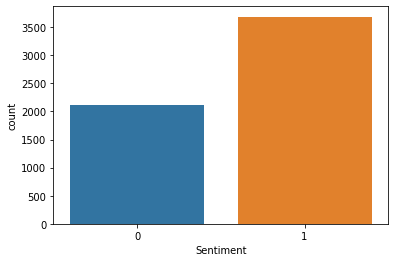

In [ ]:
sns.countplot(stock_df['Sentiment'])

In [ ]:
# Find the number of unique values in a particular column
stock_df['Sentiment'].nunique()

2

**MINI CHALLENGE #2 SOLUTION:** 
- **Remove punctuations using a different method**


In [ ]:
Test_punc_removed = []
for char in Test: 
    if char not in string.punctuation:
        Test_punc_removed.append(char)

# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Finance with Python'

**MINI CHALLENGE #3 SOLUTION:**

- **Modify the code in order keep words that are longer than or equal 2 characters instead of 3**
- **Add 'https' to the list of stopwords and rerun the code**



In [ ]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https'])

In [ ]:
# Remove stopwords and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >= 2 and token not in stop_words:
            result.append(token)
            
    return result

**MINI CHALLENGE #4 SOLTUTION:**
- **Visualize the wordcloud for tweets that have negative sentiment**

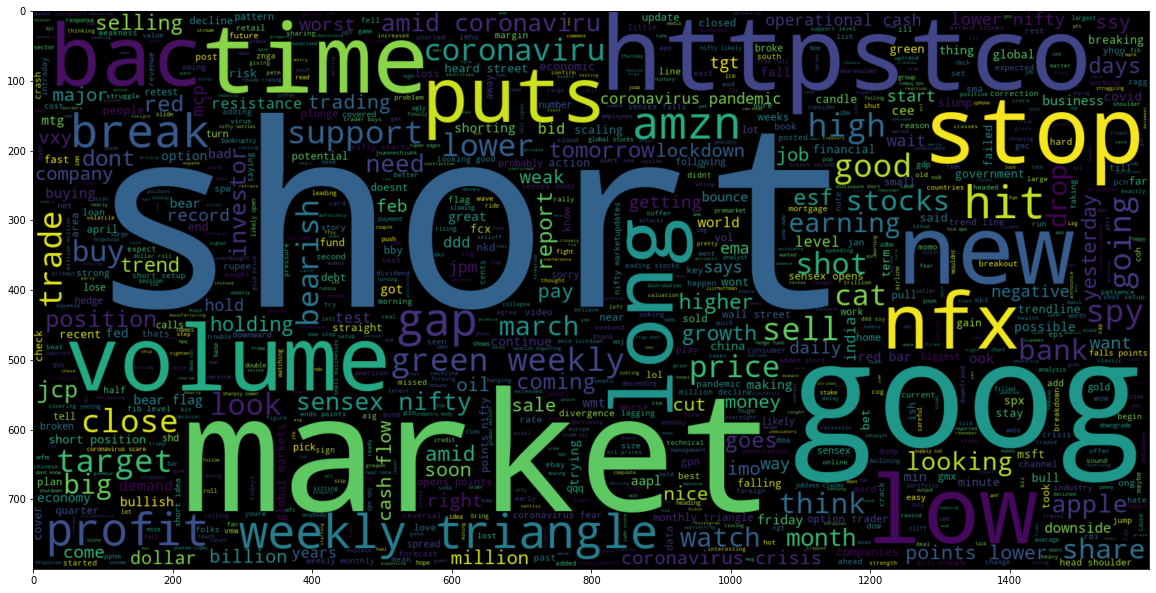

In [ ]:
# plot the word cloud for text that is negative
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000, width = 1600, height = 800 ).generate(" ".join(stock_df[stock_df['Sentiment'] == 0]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

**MINI CHALLENGE #5 SOLUTION:**
- **Use Seaborn Countplot to visually indicate how many samples belong to the positive and negative sentiments**

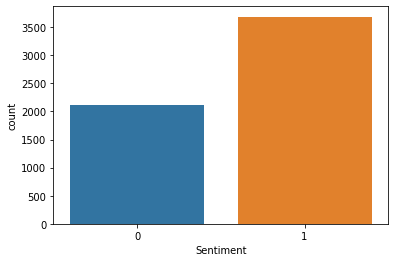

In [ ]:
# plot the word count
sns.countplot(stock_df['Sentiment'])

**MINI CHALLENGE #6 SOLUTION:**

- **Change the padding length to 15 and rerun the code. Verify that padding was successful**


In [ ]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 15, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 15, truncating = 'post')

**MINI CHALLENGE #7 SOLUTION:**
- **Train the model using different embedding output dimension**

In [ ]:
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 256))

# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 256)         2332928   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               394240    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,760,193
Trainable params: 2,760,193
Non-trainable params: 0
_________________________________________________________________


**MINI CHALLENGE #8 SOLTUTION:**

- **Use a pretrained BERT model to make a sentiment analysis predictions**

In [ ]:
!pip install transformers

     |████████████████████████████████| 890kB 2.9MB/s 
     |████████████████████████████████| 890kB 17.9MB/s 
     |████████████████████████████████| 3.0MB 18.2MB/s 
     |████████████████████████████████| 1.1MB 44.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=51b2df14546acfee6ecd34ab98a6c68c3db01285fe1998afc243ef4e7d81b35c
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
# Use pipeline from transformer to perform specific task. 
# Mention sentiment analysis as task and pass in the string to it, to get the results
# We can specify tasks like topic modeling, Q and A, text summarization here.
from transformers import pipeline

nlp = pipeline('sentiment-analysis')

# Make prediction on the test data
pred = nlp(list(X_test))

# Since predicted value is a dictionary, get the label from the dict
prediction = []
for i in pred:
  prediction.append(i['label'])

# print the final results
for i in range(len(prediction[:3])):
  print("\n\nNews :\n\n", df[df.combined == X_test.values[i]].Text.item(), "\n\nOriginal value :\n\n",
      category[df[df.combined == X_test.values[i]].Sentiment.item()], "\n\nPredicted value :\n\n", prediction[i], "\n\n\n")

ValueError: ignored